In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn import preprocessing
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('California.csv')

In [3]:
data.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

In [4]:
print(data.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


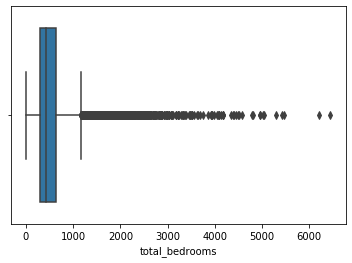

In [5]:
# There are some missing values in the total bedrooms column. This needs to be treated before further analysis can be done.
# Mean or median can be used to fill missing values. However, this would be based on how many outlier values are present in the column data.
# Checking outliers
sns.boxplot(x='total_bedrooms', data=data)
plt.show()
# The box plot shows that there too many outliers in the column data. This can heavily influence the values, in case missing values are filled using mean. Hence, median can be used to fill missing values.

In [6]:
data['total_bedrooms']=data['total_bedrooms'].fillna(data['total_bedrooms'].median())
data

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


In [7]:
print(data.isnull().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


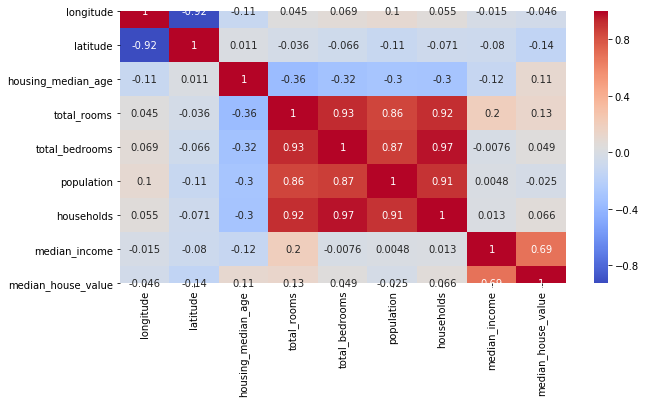

In [8]:
plt.figure(figsize=(10, 5))
corr=data.corr()
sns.heatmap(corr, cmap='coolwarm', annot=True)
plt.show()
# There is a high correlation between house value and income

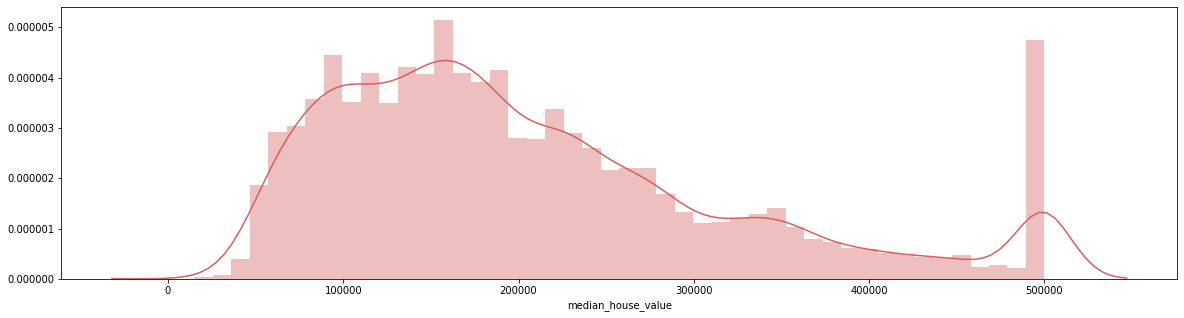

In [9]:
# Analyzing the distribution of data for dependent variable 'median house price'
# There is a sudden increase in median value at >= 5,00,000 which can be largely due to the presence of outliers
plt.figure(figsize=(20,5))
sns.set_color_codes(palette="muted")
sns.distplot(data['median_house_value'],color='r')
plt.show()

In [10]:
# Removing outliers from the data
Q1=data.quantile(0.25)
Q3=data.quantile(0.75)
IQR=Q3-Q1
print(IQR)

longitude                  3.79000
latitude                   3.78000
housing_median_age        19.00000
total_rooms             1700.25000
total_bedrooms           346.25000
population               938.00000
households               325.00000
median_income              2.17985
median_house_value    145125.00000
dtype: float64


In [11]:
data=data[~((data < (Q1-1.5*IQR)) | (data > (Q3+1.5*IQR))).any(axis=1)]
data.shape

(17609, 10)

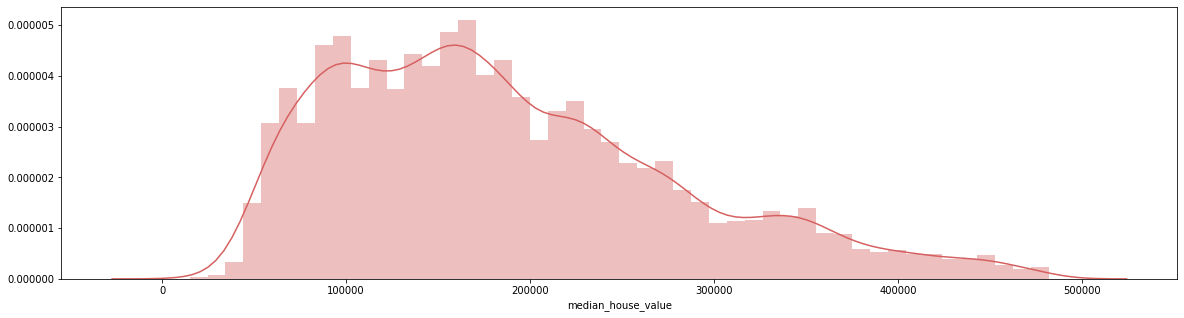

In [12]:
# The outliers have been removed from the data
plt.figure(figsize=(20,5))
sns.set_color_codes(palette="muted")
sns.distplot(data['median_house_value'],color='r')
plt.show()

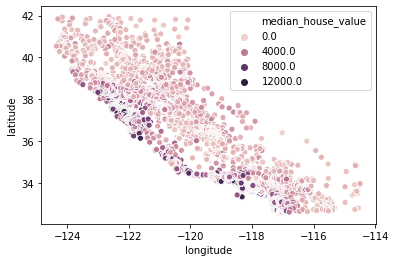

In [13]:
# Analyzing the house prices based on different locations
# The scatter plot indicates that house prices varies depending on the location
sns.scatterplot(x='longitude', y='latitude', hue=data['median_house_value']/50, data=data)
plt.show()

In [14]:
# The dataset contains 'total_rooms' for each area which only shows the total number of rooms in a particular location. However, a more specific indicator would be number of rooms per household.
data['rooms_household']=data['total_rooms']/data['households']
data['bedrooms_household']=data['total_bedrooms']/data['households']

In [15]:
# Dropping the total_rooms column
data.drop(columns=['total_rooms', 'total_bedrooms'], inplace=True)
data

,longitude,latitude,housing_median_age,population,households,median_income,median_house_value,ocean_proximity,rooms_household,bedrooms_household
2,-122.24,37.85,52.0,496.0,177.0,7.2574,352100.0,NEAR BAY,8.288136,1.073446
3,-122.25,37.85,52.0,558.0,219.0,5.6431,341300.0,NEAR BAY,5.817352,1.073059
4,-122.25,37.85,52.0,565.0,259.0,3.8462,342200.0,NEAR BAY,6.281853,1.081081
5,-122.25,37.85,52.0,413.0,193.0,4.0368,269700.0,NEAR BAY,4.761658,1.103627
6,-122.25,37.84,52.0,1094.0,514.0,3.6591,299200.0,NEAR BAY,4.931907,0.951362
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,845.0,330.0,1.5603,78100.0,INLAND,5.045455,1.133333
20636,-121.21,39.49,18.0,356.0,114.0,2.5568,77100.0,INLAND,6.114035,1.315789
20637,-121.22,39.43,17.0,1007.0,433.0,1.7000,92300.0,INLAND,5.205543,1.120092
20638,-121.32,39.43,18.0,741.0,349.0,1.8672,84700.0,INLAND,5.329513,1.171920


In [16]:
data.skew()

longitude             -0.268725
latitude               0.429243
housing_median_age     0.013163
population             0.623995
households             0.586066
median_income          0.567187
median_house_value     0.766829
rooms_household       18.641748
bedrooms_household    29.569896
dtype: float64

In [17]:
x=data.drop(columns=['median_house_value'])
y=data['median_house_value']

In [18]:
# Removing skewness from data
for index in x.skew().index:
    if x.skew().loc[index]>0.5:
        x[index]=np.log1p(x[index])
    if x.skew().loc[index]<-0.5:
        x[index]=np.square(x[index])

In [19]:
x.skew()

longitude            -0.268725
latitude              0.429243
housing_median_age    0.013163
population           -1.062738
households           -0.980577
median_income        -0.163561
rooms_household       1.488902
bedrooms_household    8.183546
dtype: float64

In [54]:
# There are categorical variables in the dataset
le=LabelEncoder()
le.fit(x['ocean_proximity'])
x['ocean_proximity']=le.transform(x['ocean_proximity'])
x

,longitude,latitude,housing_median_age,population,households,median_income,ocean_proximity,rooms_household,bedrooms_household
2,-122.24,37.85,52.0,38.546590,26.850881,2.111110,3,2.228738,0.729212
3,-122.25,37.85,52.0,40.020167,29.091218,1.893579,3,1.919471,0.729025
4,-122.25,37.85,52.0,40.177775,30.921180,1.578195,3,1.985385,0.732888
5,-122.25,37.85,52.0,36.311061,27.750330,1.616771,3,1.751225,0.743663
6,-122.25,37.84,52.0,48.979137,38.989620,1.538822,3,1.780346,0.668528
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,45.434601,33.664578,0.940124,1,1.799307,0.757686
20636,-121.21,39.49,18.0,34.547778,22.514381,1.268861,1,1.962070,0.839751
20637,-121.22,39.43,17.0,47.827231,36.881870,0.993252,1,1.825443,0.751460
20638,-121.32,39.43,18.0,43.683497,34.315381,1.053336,1,1.845223,0.775611


In [21]:
x=pd.get_dummies(x, drop_first=True)
x

,longitude,latitude,housing_median_age,population,households,median_income,rooms_household,bedrooms_household,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,-122.24,37.85,52.0,38.546590,26.850881,2.111110,2.228738,0.729212,0,0,1,0
3,-122.25,37.85,52.0,40.020167,29.091218,1.893579,1.919471,0.729025,0,0,1,0
4,-122.25,37.85,52.0,40.177775,30.921180,1.578195,1.985385,0.732888,0,0,1,0
5,-122.25,37.85,52.0,36.311061,27.750330,1.616771,1.751225,0.743663,0,0,1,0
6,-122.25,37.84,52.0,48.979137,38.989620,1.538822,1.780346,0.668528,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,45.434601,33.664578,0.940124,1.799307,0.757686,1,0,0,0
20636,-121.21,39.49,18.0,34.547778,22.514381,1.268861,1.962070,0.839751,1,0,0,0
20637,-121.22,39.43,17.0,47.827231,36.881870,0.993252,1.825443,0.751460,1,0,0,0
20638,-121.32,39.43,18.0,43.683497,34.315381,1.053336,1.845223,0.775611,1,0,0,0


In [22]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x)
x=sc.transform(x)
x=pd.DataFrame(x)
x

,0,1,2,3,4,5,6,7,8,9,10,11
0,-1.314670,0.994033,1.843602,-1.182542,-1.186792,2.003132,1.904137,-0.023346,-0.706956,-0.016853,2.875395,-0.380695
1,-1.319658,0.994033,1.843602,-1.005969,-0.859742,1.322772,0.485756,-0.025056,-0.706956,-0.016853,2.875395,-0.380695
2,-1.319658,0.994033,1.843602,-0.987083,-0.592600,0.336364,0.788057,0.010342,-0.706956,-0.016853,2.875395,-0.380695
3,-1.319658,0.994033,1.843602,-1.450418,-1.055488,0.457016,-0.285865,0.109105,-0.706956,-0.016853,2.875395,-0.380695
4,-1.319658,0.989418,1.843602,0.067552,0.585250,0.213221,-0.152311,-0.579558,-0.706956,-0.016853,2.875395,-0.380695
...,...,...,...,...,...,...,...,...,...,...,...,...
17604,-0.741043,1.746347,-0.368148,-0.357177,-0.192112,-1.659293,-0.065351,0.237632,1.414515,-0.016853,-0.347778,-0.380695
17605,-0.800900,1.750962,-0.941565,-1.661706,-1.819844,-0.631121,0.681124,0.989809,1.414515,-0.016853,-0.347778,-0.380695
17606,-0.805888,1.723270,-1.023482,-0.070476,0.277555,-1.493129,0.054517,0.180567,1.414515,-0.016853,-0.347778,-0.380695
17607,-0.855769,1.723270,-0.941565,-0.567005,-0.097107,-1.305207,0.145235,0.401933,1.414515,-0.016853,-0.347778,-0.380695


In [23]:
y=np.array(y)
y.reshape(-1,1)
y=pd.DataFrame(y)

In [24]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(y)
y=sc.transform(y)
y=pd.DataFrame(y)
y

,0
0,1.760119
1,1.644942
2,1.654540
3,0.881356
4,1.195962
...,...
17604,-1.161984
17605,-1.172648
17606,-1.010546
17607,-1.091597


In [25]:
from sklearn.metrics import r2_score
def maxr2score(cm,x,y):
    maxr2=0
    rs=0
    for r_state in range(0,150):
        x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = r_state,test_size=0.2)
        cm.fit(x_train,y_train)
        y_pred=cm.predict(x_test)
        rsc=r2_score(y_test,y_pred)
        if rsc>maxr2:
            maxr2=rsc
            rs=r_state
    print("Maximum r2_score is at random state :",rs," and it is :",maxr2)

In [26]:
# Using Linear regression model
from sklearn.linear_model import LinearRegression
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=.20)
lr=LinearRegression()
lr.fit(x_train,y_train)
predicty=lr.predict(x_test)
print('The mean absolute error for linear regression model is :', mean_absolute_error(y_test, predicty))
print('The mean square error for linear regression model is :', mean_squared_error(y_test, predicty))
print('The root mean square error for linear regression model is :', np.sqrt(mean_squared_error(y_test, predicty)))

The mean absolute error for linear regression model is : 0.477644822483737
The mean square error for linear regression model is : 0.4182081080411587
The root mean square error for linear regression model is : 0.6466901174760279


In [27]:
print("Mean r2 score for Linear regression after cross validation: ", cross_val_score(lr,x,y,cv=5,scoring="r2").mean())
print("Standard deviation for Linear regression from mean           r2 score is : ", cross_val_score(lr,x,y,cv=5,scoring="r2").std())

Mean r2 score for Linear regression after cross validation:  0.4911304778487719
Standard deviation for Linear regression from mean r2 score is :  0.09015390677471848


In [35]:
# Using Ridge regression
from sklearn.linear_model import Ridge
rr=Ridge()
hyperparametersrr={'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
gridrr = GridSearchCV(rr, hyperparametersrr, cv=10)
gridrr.fit(x,y)
gridrr.best_params_

{'alpha': 0.0001}

In [36]:
from sklearn.linear_model import Ridge
rr=Ridge(alpha=0.0001)
maxr2score(rr,x,y)

Maximum r2_score is at random state : 110  and it is : 0.6354483401794311


In [38]:
print("Mean r2 score for Ridge regression after cross validation: ", cross_val_score(rr,x,y,cv=5,scoring="r2").mean())
print("Standard deviation for Ridge regression from mean r2 score is : ", cross_val_score(rr,x,y,cv=5,scoring="r2").std())

Mean r2 score for Ridge regression after cross validation:  0.49113047561560175
Standard deviation for Ridge regression from mean r2 score is :  0.09015390787694326


In [39]:
# Using Lasso regression
from sklearn.linear_model import Lasso
lar=Lasso()
hyperparameterlar={'alpha':[0.0001, 0.001, 0.01, 0.1, 1, 10, 100]}
gridlar = GridSearchCV(lar, hyperparameterlar, cv=5)
gridlar.fit(x,y)
gridlar.best_params_

{'alpha': 0.0001}

In [40]:
from sklearn.linear_model import Lasso
lar=Lasso(alpha=0.0001)
maxr2score(lar,x,y)

Maximum r2_score is at random state : 110  and it is : 0.6353980708397684


In [41]:
print("Mean r2 score for Lasso regression after cross validation: ", cross_val_score(lar,x,y,cv=5,scoring="r2").mean())
print("Standard deviation for Lasso regression from mean r2 score is : ", cross_val_score(lar,x,y,cv=5,scoring="r2").std())

Mean r2 score for Lasso regression after cross validation:  0.49106779404321166
Standard deviation for Lasso regression from mean r2 score is :  0.09018800834888709


In [42]:
# Using KNN regressor
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor()
hyperparameter={"n_neighbors":range(1,12)}
gridknr = GridSearchCV(knr, hyperparameter, cv=5, n_jobs=-1)
gridknr.fit(x,y)
gridknr.best_params_

{'n_neighbors': 11}

In [43]:
from sklearn.neighbors import KNeighborsRegressor
knr=KNeighborsRegressor(n_neighbors=11)
maxr2score(knr,x,y)

Maximum r2_score is at random state : 34  and it is : 0.7159812788359348


In [90]:
print("Mean r2 score for KNeighborsRegressor after cross validation: ", cross_val_score(knr,x,y,cv=5,scoring="r2").mean())
print("Standard deviation for KNeighborsRegressor from mean r2 score is : ", cross_val_score(knr,x,y,cv=5,scoring="r2").std())

Mean r2 score for KNeighborsRegressor after cross validation:  0.4524240598881413
Standard deviation for KNeighborsRegressor from mean r2 score is :  0.08535259372027969


In [91]:
# Using Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor()
hyperparametersdtr={'criterion':['mse','mae'],'max_depth':range(1,2)}
griddtr=GridSearchCV(dtr, hyperparametersdtr, cv=5, scoring='r2')
griddtr.fit(x,y)
print(griddtr.best_params_)

{'criterion': 'mse', 'max_depth': 1}


In [93]:
from sklearn.tree import DecisionTreeRegressor
dtr=DecisionTreeRegressor(criterion='mse', max_depth=1)
maxr2score(dtr,x,y)

Maximum r2_score is at random state : 110  and it is : 0.30088527128568865


In [94]:
print("Mean r2 score for Decision Tree Regressor after cross validation: ", cross_val_score(dtr,x,y,cv=5,scoring="r2").mean())
print("Standard deviation for Decision Tree Regressor from mean r2 score is : ", cross_val_score(dtr,x,y,cv=5,scoring="r2").std())

Mean r2 score for Decision Tree Regressor after cross validation:  0.15969384888113153
Standard deviation for Decision Tree Regressor from mean r2 score is :  0.0818170706315439


In [100]:
x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=42,test_size=.20)
lr=LinearRegression()
lr.fit(x_train,y_train)
predictlry=lr.predict(x_test)
print('The mean absolute error for linear regression model is :', mean_absolute_error(y_test, predictlry))
print('The mean square error for linear regression model is :', mean_squared_error(y_test, predictlry))
print('The root mean square error for linear regression model is :', np.sqrt(mean_squared_error(y_test, predictlry)))

The mean absolute error for linear regression model is : 0.4875024547582616
The mean square error for linear regression model is : 0.42888144995853533
The root mean square error for linear regression model is : 0.6548904106478697


In [117]:
from sklearn.externals import joblib
joblib.dump(lr,'California.pkl')

['California.pkl']